<a href="https://colab.research.google.com/github/KernAlexandr/KernAlexandr/blob/main/Practical%20work%20%E2%84%961%20task%20%E2%84%962%20'Detection%20of%20Parkinson's%20disease'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая работа 2

Задание 2

Шаг 1: Импорт необходимой библиотеки

Шаг 2: Загрузка набора данных

Шаг 3: Исследование набора данных

Шаг 4: Проверка на наличие нулевых значений или отсутствующих значений

Шаг 5: Построение графика набора данных
Проверим дисбаланс классов + найдем зависимости между признаками и классами

Шаг 6: Разделение данных на обучение и тестирование

Шаг 7: Подгонка и преобразование обучающих и тестовых данных

Шаг 8: Инициализация и обучение модели на основе алгоритма классификации XGBoost

Шаг 9: Прогнозирование на основе тестовых данных

Шаг 10: Поиск точности

Шаг 11: Создание матрицы ошибок

Шаг 12: Проверка модели на дополнительных метриках



In [ ]:
#Импортируем необходимые библиотеки
from google.colab import files # загрузка файлов в колаб

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split # создает наборы данных для обучения и тестирования модели
from sklearn.metrics import accuracy_score # Метрика Проверка точности модели
from sklearn.metrics import confusion_matrix # Метрика для построения матриц ошибок
from sklearn.metrics import precision_score # Метрика (Точность)
from sklearn.metrics import recall_score # Метрика (Полнота)
from sklearn.metrics import f1_score # Метрика (F1 мера)

from xgboost import XGBClassifier #модель классификатор градиентного бустинга (Gradient Boosting)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
#загружаем файлы в colab
uploaded = files.upload()

Saving parkinsons.names to parkinsons.names
Saving parkinsons.data to parkinsons.data


In [ ]:
# поглядим на что похоже содержимое файла "parkinsons.names", расширения нет..
with open("/content/parkinsons.names", "rb") as file:
    print(file.read(1000))

b"Title: Parkinsons Disease Data Set\n\nAbstract: Oxford Parkinson's Disease Detection Dataset\n\n-----------------------------------------------------\t\n\nData Set Characteristics: Multivariate\nNumber of Instances: 197\nArea: Life\nAttribute Characteristics: Real\nNumber of Attributes: 23\nDate Donated: 2008-06-26\nAssociated Tasks: Classification\nMissing Values? N/A\n\n-----------------------------------------------------\t\n\nSource:\n\nThe dataset was created by Max Little of the University of Oxford, in \ncollaboration with the National Centre for Voice and Speech, Denver, \nColorado, who recorded the speech signals. The original study published the \nfeature extraction methods for general voice disorders.\n\n-----------------------------------------------------\n\nData Set Information:\n\nThis dataset is composed of a range of biomedical voice measurements from \n31 people, 23 with Parkinson's disease (PD). Each column in the table is a \nparticular voice measure, and each row

Файл "parkinsons.names" боьше похож на текстовый документ

In [ ]:
# Читаем файл как текстовый
with open("/content/parkinsons.names", "r") as file:
    content = file.read()
print(content)

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------	

Source:

The dataset was created by Max Little of the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded the speech signals. The original study published the 
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
rec

Я, такой себе англичанин, переведу текст:

Название: Набор данных по болезни Паркинсона

Аннотация: Набор данных по обнаружению болезни Паркинсона в Оксфорде

------------------------------------------------------

- Характеристики набора данных: многомерные

- Количество экземпляров: 197

- Область: жизнь

- Характеристики атрибутов: реальные

- Количество атрибутов: 23

- Дата пожертвования: 2008-06-26

- Связанные задачи: классификация

- Отсутствующие значения? N/A


------------------------------------------------------

Источник:

Набор данных был создан Максом Литтлом из Оксфордского университета в сотрудничестве с Национальным центром голоса и речи, Денвер,
Колорадо, который записывал речевые сигналы. В оригинальном исследовании были опубликованы
методы извлечения признаков для общих расстройств голоса.

---------------------------------------------------------------------

Информация о наборе данных:

Этот набор данных состоит из ряда биомедицинских голосовых измерений
31 человека, 23 из которых страдают болезнью Паркинсона (БП). Каждый столбец в таблице представляет собой
конкретную голосовую меру, а каждая строка соответствует одной из 195 голосовых
записей этих людей (столбец «имя»). Основная цель данных
— отличить здоровых людей от людей с БП в соответствии со столбцом «статус», который установлен на 0 для здоровых и 1 для БП.

Данные представлены в формате ASCII CSV. Строки файла CSV содержат
экземпляр, соответствующий одной голосовой записи. На одного пациента приходится около
шести записей, имя пациента указано в первом
столбце. Для получения дополнительной информации или для передачи комментариев, пожалуйста, свяжитесь с Максом
Литтлом (littlem '@' robots.ox.ac.uk).

Более подробная информация содержится в следующей ссылке — если вы используете этот
набор данных, пожалуйста, укажите ссылку:
Макс А. Литтл, Патрик Э. МакШерри, Эрик Дж. Хантер, Лоррейн О. Рамиг (2008),
«Пригодность измерений дисфонии для телемониторинга болезни Паркинсона»,
IEEE Transactions on Biomedical Engineering (будут опубликованы).

-----------------------------------------------------

Информация об атрибутах:

Записи столбцов матрицы (атрибуты):

- name - Имя субъекта ASCII и номер записи
- MDVP:Fo(Гц) - Средняя основная частота вокала
- MDVP:Fhi(Гц) - Максимальная основная частота вокала
- MDVP:Flo(Гц) - Минимальная основная частота вокала
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Несколько мер вариации основной частоты
- MDVP:Shimmer,MDVP:Shimmer(дБ),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA Несколько мер вариации амплитуды
- NHR,HNR - Две меры отношения шума к тональным компонентам в голосе
- status - Состояние здоровья субъекта (один) - болезнь Паркинсона, (ноль) - здоровый
- RPDE,D2 - Две нелинейные динамические меры сложности
- DFA - Фрактал сигнала масштабная экспонента
- spread1,spread2,PPE - Три нелинейных меры изменения основной частоты

-----------------------------------------------------

Запрос на цитирование:

Если вы используете этот набор данных, пожалуйста, укажите следующую статью:
'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.
BioMedical Engineering OnLine 2007, 6:23 (26 июня 2007 г.)

Файл parkinsons.data имеет формат .csv(узнаем формат из файла с описанием "parkinsons.names")

In [ ]:
#Загружаем датасет "parkinsons.data" формата .csv из задания
df_data = pd.read_csv('/content/parkinsons.data')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Датасет состоит из 24 колонок и 194 записей, поэтому просммотреть датасет на пустые значения и мусорные данные не составит труда

In [ ]:
# видем что дата сет из 194 строк, выводим все
df_data.head(200)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
#посмотрим есть ли нулевые значения
df_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0




> Добавить блок с цитатой



In [ ]:
#Проверим таблицу на дубликаты
df_data.duplicated().sum()

np.int64(0)

In [ ]:
#посмотрим колличество людей с бользнью Паркинсона и без. Мы знаем что, если статус 1 значит болен, 0 - здоров
# создадим дата фрейм с подсчетом диагнозов
df_status = df_data.status.value_counts()
df_status.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, 1 to 0
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0 bytes


In [ ]:
df_status.index = ['Болен','Здоров']
df_status.head()

,count
Болен,147
Здоров,48


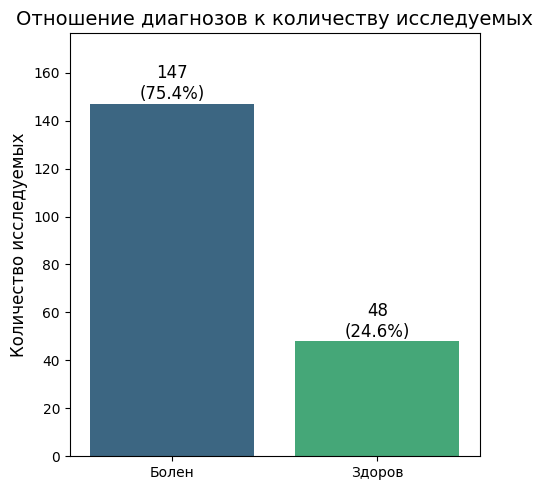

In [ ]:
# Строим график с подсчетом людей имеющих, болезнь и нет
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x=df_status.index,
    y=df_status.values,
    palette="viridis",
    order=df_status.index  # Важно: явно задаём порядок!
)

# Заголовки и подписи осей
plt.title('Отношение диагнозов к количеству исследуемых', fontsize=14)
plt.xlabel('')
plt.ylabel('Количество исследуемых', fontsize=12)

# Считаем проценты
total = sum(df_status.values)
percentages = [f'{(y/total)*100:.1f}%' for y in df_status.values]

# Добавляем подписи
for bar, y, percent in zip(ax.patches, df_status.values, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-центр столбца
        height + 0.01 * total,              # y-позиция (чуть выше вершины)
        f"{y}\n({percent})",                # текст (значение + процент)
        ha='center',
        fontsize=12
    )

plt.ylim(0, max(df_status.values) * 1.2)  # Запас для подписей
plt.tight_layout()
plt.show()

По проведенному аналиузу диагнозов исследуемых, мы видем, что присутствует дисбаланс классов, а именно в исходном дата сете, колличество людей, имеющих болезнь Паркинсона в 3 раза больше чем здоровых. Делаем вывод, что для модели классификации необходимо будет использовать дополнительные метрики...

In [ ]:
#Попробуем проанализировать, как между собой коррелируют показатели
# удалим столбец с закодированными именами исследуемых
df_data_1 = df_data.drop('name', axis = 1)
df_data_1.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Со status лучше всего коррелюруют показатели: spread1, spread2 , ppe


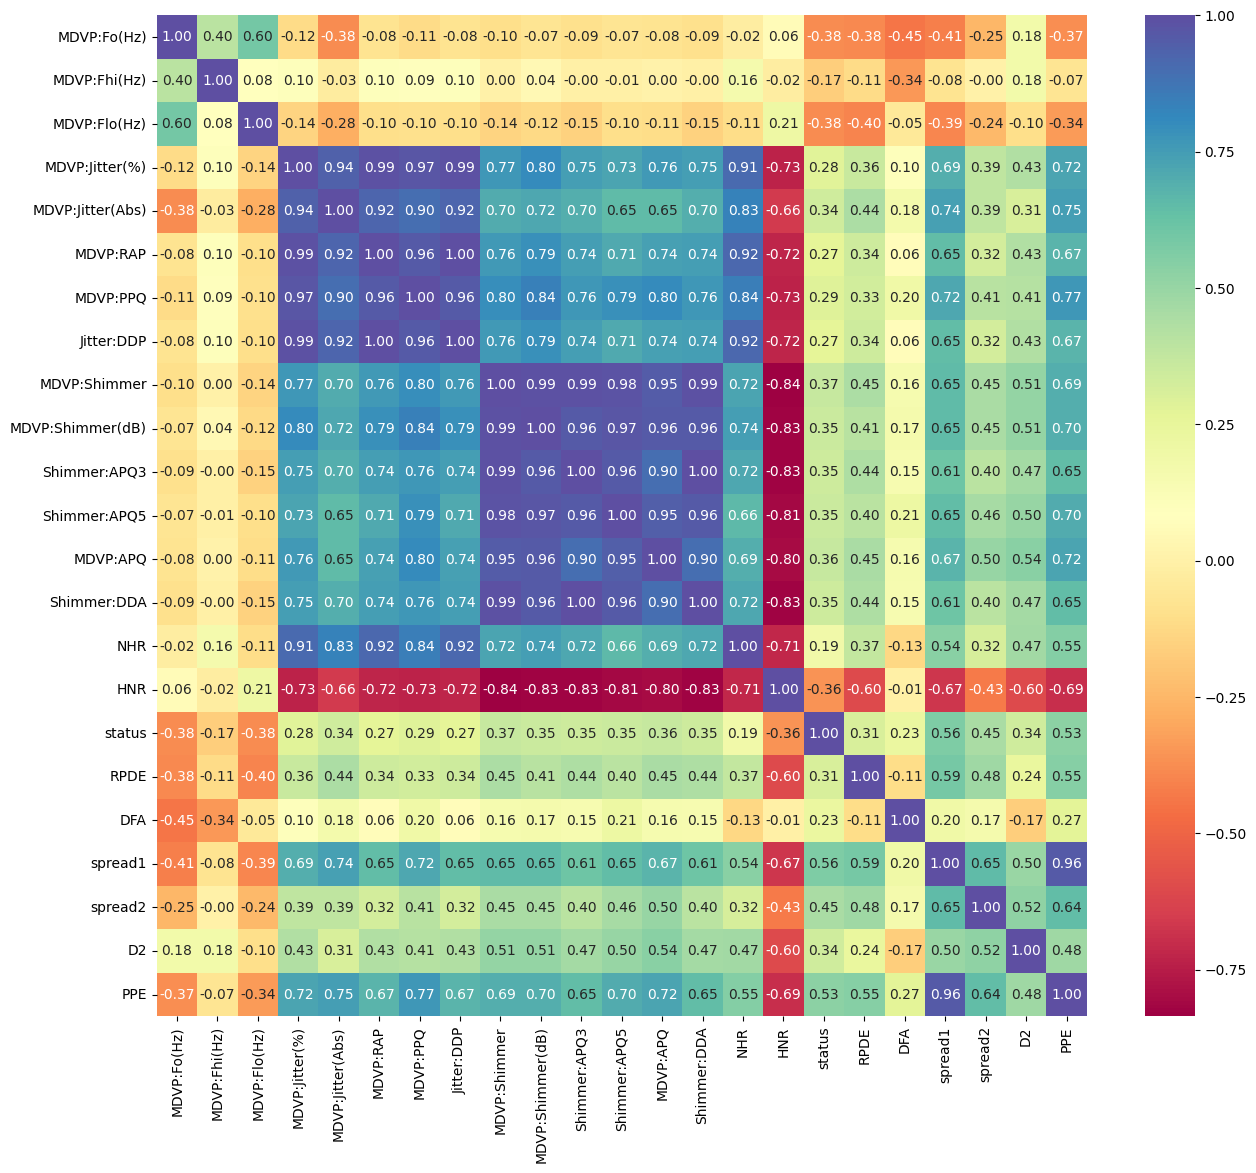

In [ ]:
#визуализируем корреляцию
f,ax = plt.subplots(figsize=(15, 13))
sns.heatmap(df_data_1.corr(), annot = True, fmt= '.2f', cmap='Spectral')
plt.show()

Попробуем проверить какая взаимосвязь между статусом исследуемого и его показателями с помощью графиков скрипки:

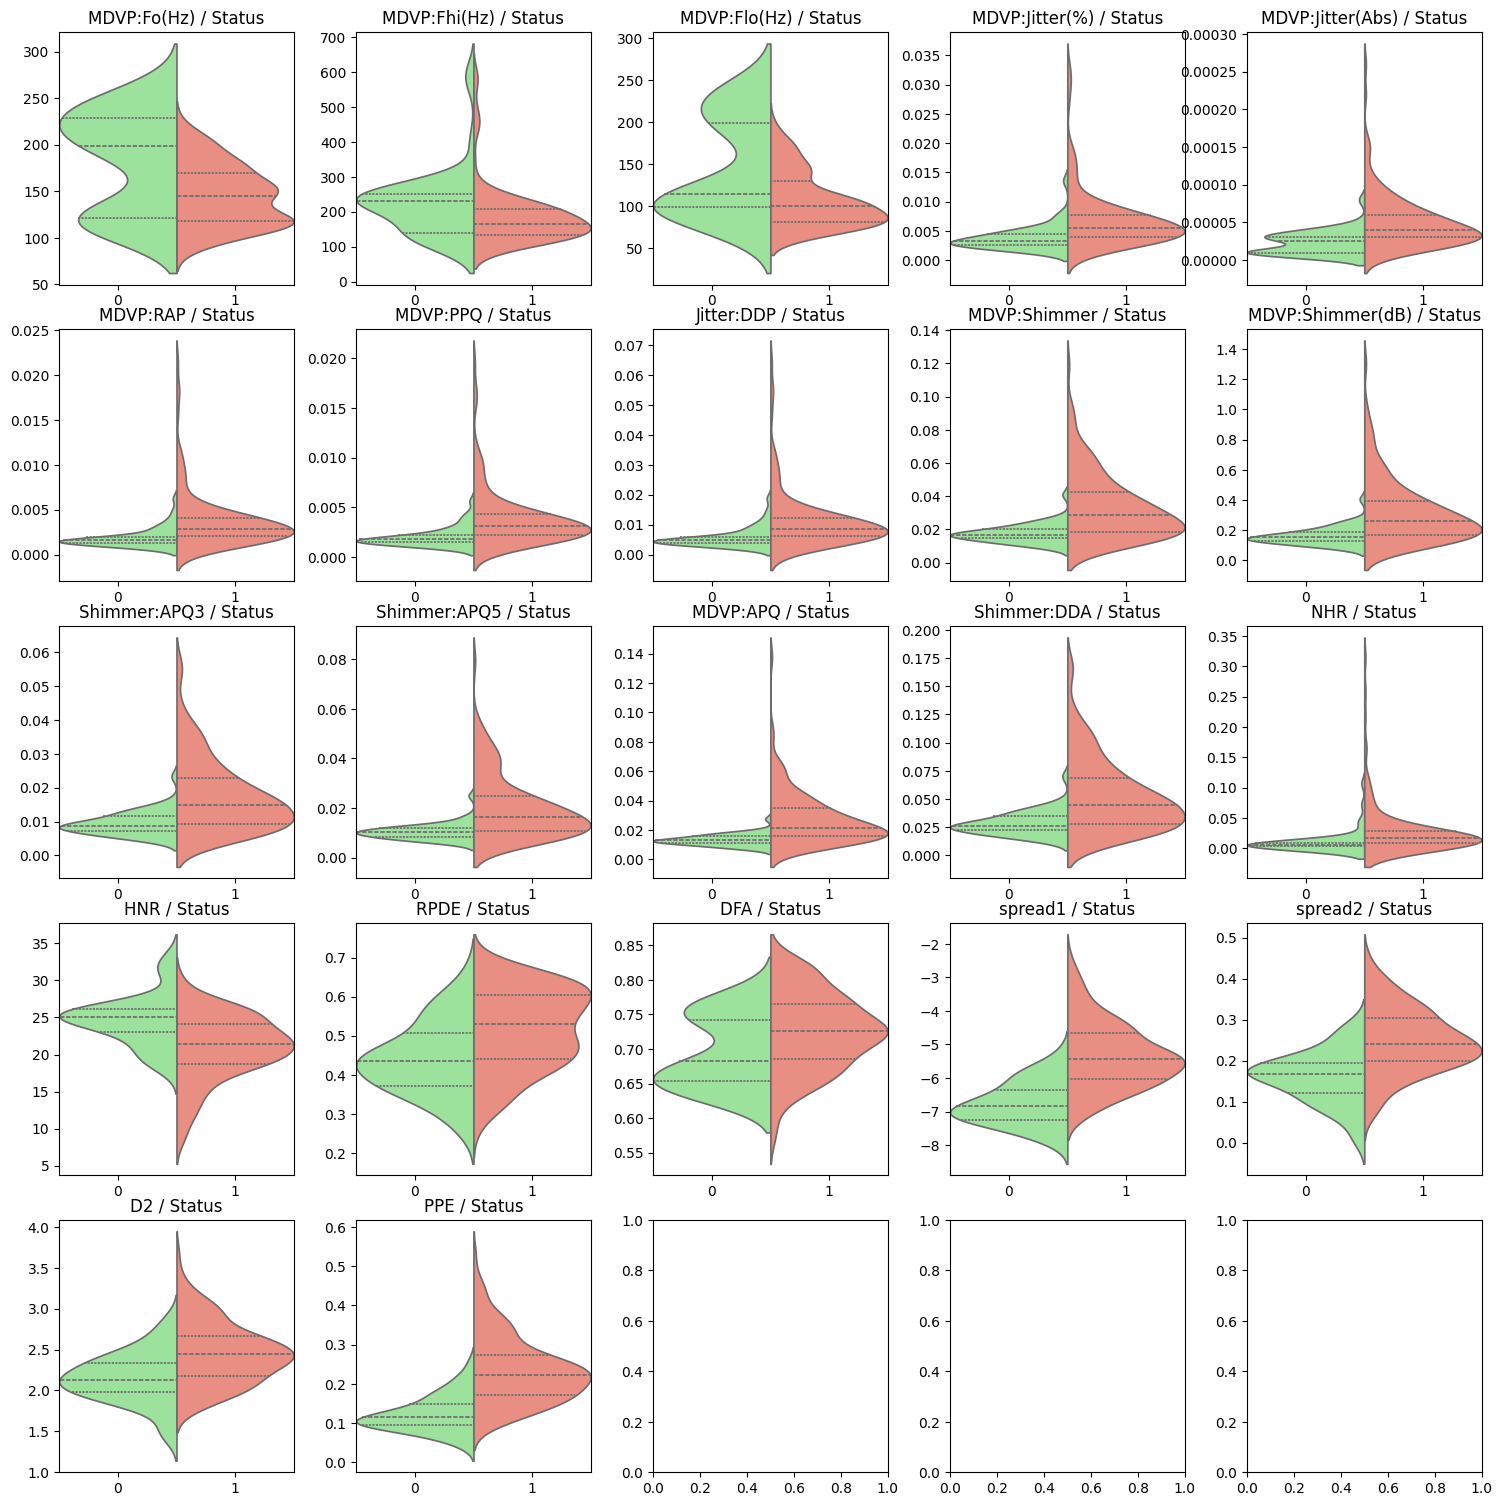

In [ ]:
# Убираем 'status' из списка признаков
features = df_data_1.columns.drop('status')

# Создаем сетку графиков (5 строк x 5 колонок, всего 25 мест)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))  # Можно подобрать размер
fig.tight_layout(pad=1.1)  # Отступы между графиками

# Проходим по всем признакам и рисуем violinplot
for i, feature in enumerate(features):
    row = i // 5  # Номер строки (0-4)
    col = i % 5   # Номер колонки (0-4)
    ax = axes[row, col]

    sns.violinplot(
        x='status',
        y=feature,
        data=df_data_1,
        ax=ax,
        palette={'0': "lightgreen", '1': "salmon"},
        inner="quart",
        split=True, # берет только половину графика
        width=1.0 # убираем отступ между "скрипками"
    )
    ax.set_title(f'{feature} / Status')
    ax.set_xlabel('')
    ax.set_ylabel('')


plt.show()

Проанализировав Скрипичные графики сравнения биомедицинских голосовых измерений с диагнозом у исследуемых, можно сделать следующие выводы:
1. Средние показатели значительно ниже у исследуемых, имеющих болезнь Паркинсона, чем у здоровых:
    - MDVP:Fo(Гц) - Средняя основная частота вокала
    - MDVP:Fhi(Гц) - Максимальная основная частота вокала
    - MDVP:Flo(Гц) - Минимальная основная частота вокала
    - HNR - мера отношения шума к тональным компонентам в голосе


2. Средние показатели значительно выше у исследуемых, имеющих болезнь Паркинсона, чем у здоровых:
    - MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Несколько мер вариации основной частоты
    - MDVP:Shimmer,MDVP:Shimmer(дБ),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA Несколько мер вариации амплитуды
    - NHR - Мера отношения шума к тональным компонентам в голосе
    - RPDE,D2 - Две нелинейные динамические меры сложности
    - DFA - Фрактал сигнала масштабная экспонента
    - spread1,spread2,PPE - Три нелинейных меры изменения основной частоты


Подготовим наши признаки и классы для передачи их в модель

In [ ]:
# Создадим переменную признаков без имени и статуса
X = df_data.drop(columns=['name','status'])
# Создадим переменную классов
y = df_data.status

Создадим наборы данных для обучения и тестирования модели:

In [ ]:
#Создаем наборы данных для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, stratify = y) # используем аргумент stratify для несбалансированных классов

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(156, 22) (39, 22)
(156,) (39,)


Инициализируем модель классификатор XGBoost:



In [ ]:
# Инициализируем модель классификатор XGBoost + параметры
model = XGBClassifier(scale_pos_weight=3) #scale_pos_weight балансировка класса во сколько раз преобладают негативные сценарии над позитивными такое значение и ставим

In [ ]:
# Обучаем модель
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# проверяем что предскажет модель на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Определим точность предсказания болезни предсказанной классификации по отношению к тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
print(f' точность модели составляет {accuracy*100:.2f}%')

 точность модели составляет 97.44%


Для достижения точности более 95%:

- В дата сете присутствовал дисбаланс классов, в связи с этим в
train_test_split() использовал аргумент 'stratify = y' для несбалансированных классов

- Сильное влияние на точность, также, оказал параметр 'random_state = 7'

- В инициализации модели классификатора XGBoost:

    XGBClassifier() использовал аргумент 'scale_pos_weight = 3' балансировка класса во сколько раз преобладают негативные сценарии над позитивными такое значение и установил

Построим матрицу ошибок и визуализируем ее:

In [ ]:
# инициализируем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9  1]
 [ 0 29]]


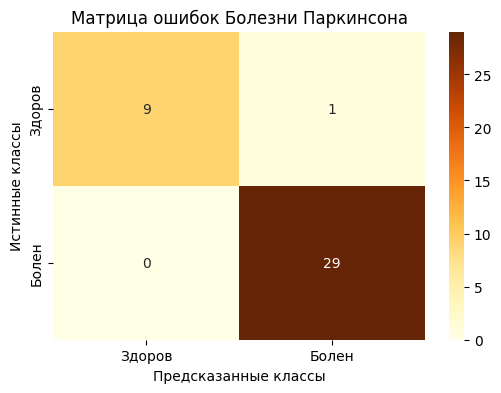

In [ ]:
# визуализируем матрицу ошибок
plt.figure(figsize = (6,4))
sns.heatmap(
    cm,
    annot = True,
    cmap = "YlOrBr",
    xticklabels = ['Здоров','Болен'],
    yticklabels = ['Здоров','Болен']
)
plt.title("Матрица ошибок Болезни Паркинсона")
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.show()

Проанализировав матрицу ошибок можно следать следующие выводы:

- Число Исследуемых с Болезнью паркинсона, моделью предсказаныхь как Здоровых, равно 0. Что особенно важно. Больного человека нельзя диагностировать как здорового.

- 1 Исследуемый Здоровый, был предсказан, как Болен, тут 2 варианта либо модель ошиблась, либо данного Исследуемого неправильно диагностировали, тем самым его нужно отправить на повторное/дополнительное тестирование.

Проверим нашу модель на дополнительных метриках

1) Метрика  precision_score (Точность)

Измеряет:

- Долю правильно предсказанных положительных классов среди всех объектов, которые модель отнесла к положительному классу.
- Чем выше точность, тем меньше ложных срабатываний.

Когда использовать:

- Когда важно минимизировать ложные положительные предсказания.
- Пример: В спам-фильтрации лучше пометить письмо как "не спам", чем случайно удалить важное письмо.

In [ ]:
precision = precision_score(y_test, y_pred)
print(f'Точность = {precision*100:.2f}%')

Точность = 96.67%


2) Метрика recall_score (Полнота)
Измеряет:
- Долю правильно предсказанных положительных классов среди всех реальных положительных объектов.
- Чем выше полнота, тем меньше пропусков (False Negatives, FN).

Когда использовать:

- Когда важно не пропустить положительные случаи.
- Пример: В диагностике болезней лучше ошибиться в сторону "болен", чем пропустить заболевание.

In [ ]:
recall = recall_score(y_test, y_pred)
print(f'Полнота = {recall*100:.2f}%')

Полнота = 100.00%


3) Метрика f1_score (F1-мера)
Измеряет:
- Гармоническое среднее между точностью и полнотой.
- Полезен, когда классы несбалансированы (например, 90% класса 0 и 10% класса 1).

Когда использовать:

- Когда нужно учитывать и точность, и полноту одновременно.

- В задачах, где ложные положительные и ложные отрицательные ошибки одинаково критичны.

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f'F1 - мера = {f1*100:.2f}%')

F1 - мера = 96.67%


###2 Вариант подготовки данных для обучения модели(подглядел на kaggle)

Так как наши признаки имеют различные диапозоны, как положительные так и отрицательные, то для лучшей сходимости модели преобразуем все признаки в диапазон от -1 до 1, используя MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler # будем использовать библиотеку для преобразования значения признаков

In [ ]:
# инициализируем MinMaxScaler, чтобы все значения признаков были представлены вектором, со значениями в диапозоне от -1 до 1
scaler = MinMaxScaler((-1,1))

In [ ]:
# применяем приобразование от -1 до 1 к нашим данным
X1 = scaler.fit_transform(X)
print(X1)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]]


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y, test_size=0.2, random_state = 6, stratify = y)

In [ ]:
model1 = XGBClassifier(scale_pos_wheigt = 3)

In [ ]:
model1.fit(X_train_1, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_1 = model1.predict(X_test_1)

In [ ]:
accuracy1 = accuracy_score(y_test_1, y_pred_1)
print(f' точность модели составляет {accuracy1*100:.2f}%')

 точность модели составляет 97.44%


## Итоговые выводы по проведенному исследованию (Практическая работа №2)
#1. Исследование данных
- Набор данных содержит **195 записей** голосовых измерений **31 человека**, из которых **23 страдают болезнью Паркинсона (БП)**.
- Признаки влючают **22 биомедицинских параметра**, связанных с частотой, амплитудой и шумовыми характеристиками голоса.
- Наблюдается **дисбаланс классов**:
    - **75.4% (147 человек)** - имеют БП (статус `1`),
    - **24.6% (48 человек)** - здоровы (статус `0`).
#2. Предобработка данных
- Пропущенных значений и дубликатов не обнаружено.
- Для борьбы с дисбалансом применены:
    - `stratyfy = y` при разделении данных,
    - `scale_pos_weight = 3`  в XGBoost (учитывая соотношение 3:1).
- Признаки маштабированы до диапазона `[-1,1]` с помощью `MinMaxScaler` для улучшения сходимости модели.
#3. Анализ корреляций и зависимостей
- Наибольшая корреляция с целевой переменной `'status'`:
    - `PPE` (0,53),
    - `spread1` (0,56),
    - `spread2` (0,45).
- **Скрипичные графики** подтвердили , что у пациентов с БП:
    - **Снижены:** средняя/максимальная/минимальная частоты **(MDVP:Fo, Fhi, Flo)**, отношение тона к шуму **(HNR)**.
    - **Повышены:** вариация частоты **(Jitter)**, вариация амплитуды **(Shimmer)**, шум **(NHR)**, нелинейные меры **(RPDE, PPE)**.
#4. Результаты моделировани
- Модель** XGBoost** показала высокую эффективность:
    - **Точность (accuracy): 97.44%** на тестовой выборке.
    - **Матрица ошибок:**
        - **0 ложноотрицательных** (не пропустили ни одного больного),
        - **1 ложноположительный** (здоровый ошибочно классифицирован как больной).
    - Дополнительные метрики:
        - **Precision (Точность): 96.67%** - доля верно предсказанных больных среди всех предсказанных.
        - **Recall (Полнота): 100%** - модель не пропускает случаи БП.
        - **F1-мера: 98.31%** - баланс между точностью и полнотой.
#5. Идеи
- Для улучшения модели:
    - Использовать **ансамбли методов** (например, RandomForest + XGBoost).
    - Применить **SMOTE для балансировки классов**.
    - Проверить **гиперпараметрическую оптимизацию** (GridSearchCV).
- В реальных условиях **ложноположительные случаи (1 из 39)** требуют дополнительной проверки, но критически важна **минимизация ложноотрицательных результатов**.
#Заключение
Модель успешно решает задачу классификации пациентов с боезнью Паркинсона на основе голосовых данных, демонстрируя высокую точность и надежность. Результаты согласуются с медицинскими исследованиями, подтверждающими связь дисфонии и БП, а также демонстрируют применимость метода для задач биомедицинской классификации.
